In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
import os
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, svm
import urllib.parse
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pickle
import collections
%matplotlib inline

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [2]:
def loadFile(name):
    directory = str(os.getcwd())
    filepath = os.path.join(directory, name)
    data = []
    with open(filepath,'r') as f:
        for i, line in enumerate(f):
            data.append(line)
    print(len(data))
    result = []
    for d in data:
        d = str(urllib.parse.unquote(d))
        result.append(d)
    return result

In [3]:
badQueries = loadFile('badqueries.txt')
validQueries = loadFile('normalquerries.txt')

5696
3443


In [14]:
badQueries = badQueries
validQueries = validQueries
allQueries = badQueries + validQueries
yBad = [1 for i in range(0, len(badQueries))]
yGood = [0 for i in range(0, len(validQueries))]
y = yBad + yGood
queries = allQueries

vectorizer = TfidfVectorizer(min_df = 0.0, analyzer="char", sublinear_tf=True, ngram_range=(1,3)) 
X = vectorizer.fit_transform(queries)

pickle.dump(vectorizer.vocabulary_,open("feature_saver.pkl","wb"))
print("y :")
collections.Counter(y)

y :


Counter({0: 3443, 1: 5696})

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
com = pca.fit_transform(X.todense())

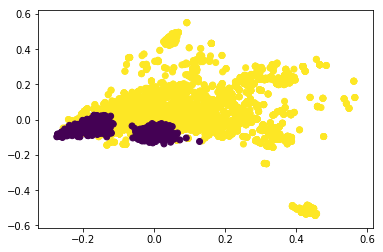

In [6]:
colors = [str(item/255.) for item in y]
# print(len(colors))
x = [c[0] for c in com]
y = [c[1] for c in com] 
plt.scatter(x, y, c=colors)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

badCount = len(badQueries)
validCount = len(validQueries)
print(X_train.shape)
print(X_test.shape)

(7311, 23519)
(1828, 23519)


In [16]:
lgs = LogisticRegression(class_weight={1: 2 * validCount / badCount, 0: 1.0})
lgs.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={1: 1.2089185393258426, 0: 1.0},
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
          random_state=None, solver='liblinear', tol=0.0001, verbose=0,
          warm_start=False)

In [22]:
predicted = lgs.predict(X_test)
print("Accuracy: %f" % lgs.score(X_test, y_test))
print("Precision: %f" % metrics.precision_score(y_test, predicted))
print("Recall: %f" % metrics.recall_score(y_test, predicted))
print("F1-Score: %f" % metrics.f1_score(y_test, predicted))
confusion_matrix(y_test, predicted)

Accuracy: 0.997265
Precision: 1.000000
Recall: 0.995686
F1-Score: 0.997838


array([[ 669,    0],
       [   5, 1154]])

In [19]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier(random_state=0)
dec.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [21]:
predictedDec = dec.predict(X_test)
print("Accuracy: %f" % dec.score(X_test, y_test))
print("Precision: %f" % metrics.precision_score(y_test, predictedDec))
print("Recall: %f" % metrics.recall_score(y_test, predictedDec))
print("F1-Score: %f" % metrics.f1_score(y_test, predictedDec))
confusion_matrix(y_test, predictedDec)

Accuracy: 0.997812
Precision: 0.998274
Recall: 0.998274
F1-Score: 0.998274


array([[ 667,    2],
       [   2, 1157]])

In [25]:
clf = svm.LinearSVC()
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [26]:
predictedSVM = clf.predict(X_test)
print("Accuracy: %f" % clf.score(X_test, y_test))
print("Precision: %f" % metrics.precision_score(y_test, predictedSVM))
print("Recall: %f" % metrics.recall_score(y_test, predictedSVM))
print("F1-Score: %f" % metrics.f1_score(y_test, predictedSVM))
confusion_matrix(y_test, predictedSVM)

Accuracy: 0.999453
Precision: 1.000000
Recall: 0.999137
F1-Score: 0.999568


array([[ 669,    0],
       [   1, 1158]])